In [1522]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [1523]:
# storing dataset path
path = "C:/Users/kasoju/Desktop/KASOJU/PGDSBA/Supervised/used_cars_data.csv"

In [1524]:
#Loading dataset
cars = pd.read_csv(path)

In [1525]:
#checking first five rowns for dataset
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [1526]:
#checking last five rows for dataset
cars.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [1527]:
#checking no of rows and columns in dataset to understand the shape of dataset
cars.shape

(7253, 14)

# EDA

In [1528]:
# making a copy of dataset to use for all further analysis
df = cars.copy()

In [1529]:
#Running info statement to check data types and non-null count info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [1530]:
#checking for total null/missing values for all columns
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [1531]:
#Using nunique statement to find out no of unique values present in each column
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [1532]:
#Checking for descriptive statistics / five statistical summary of dataset to understand about quantiles, min, max, freq std of dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253,NaN,NaN,NaN,3626,2093.91,0,1813,3626,5439,7252
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1533]:
#checking datadtypes
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

* this shows columns like Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_price are in object datatypes which requires more memory and these are not good example for our analysis.

In [1534]:
# changing below columns to category data types which helps in our analysis.(fixing data types
df["Name"] = df["Name"].astype("category")
df["Location"] = df["Location"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")

In [1535]:
df.dtypes

S.No.                   int64
Name                 category
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage                object
Engine                 object
Power                  object
Seats                 float64
New_Price              object
Price                 float64
dtype: object

* from the above we can see Mileage, Engine, Power, New_price are still in Object datatypes.

In [1536]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

* Looks like there are 6247 rows data missing in New_Price column, as majority of data is missing and this New_Price column doesn't looks like suitable for our analysis i am dropping this column.

In [1537]:
# Dropping the New_Price and S.no column
df.drop(['New_Price'], axis=1, inplace= True)
df.drop(['S.No.'], axis=1, inplace= True)

In [1538]:
df[['Mileage','Engine','Power']] = df[['Mileage','Engine','Power']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

* from the above code, we have removed spaces, extra characters like km/kg, kmpl from mileage , CC from engine, bhp from power. This helps to chage the datatypes and will be more flexible to calculate in the model.

In [1539]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [1540]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [1541]:
df.dtypes

Name                 category
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage                object
Engine                 object
Power                  object
Seats                 float64
Price                 float64
dtype: object

In [1542]:
# Converting Mileage to float
df["Mileage"] = df["Mileage"].astype("float")

In [1543]:
#Changing Power column values from string to numeric so we can proceed with imputation technique
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')

In [1544]:
df['Power'] = df['Power'].astype("float")

In [1545]:
df['Engine'] = pd.to_numeric(df['Engine'],errors='coerce')

# Missing Value Treatment

In [1546]:
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [1547]:
#Filling Engine column missing values with median imputation technique
df['Engine'].fillna(df['Engine'].median(), inplace = True)

In [1548]:
df["Engine"] = df["Engine"].astype("int64")

In [1549]:
df.dtypes

Name                 category
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                  int64
Power                 float64
Seats                 float64
Price                 float64
dtype: object

In [1550]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [1626]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2.013365e+03,3.254421,1996.000000,2011.000000,2014.000000,2016.000000,2019.000000
Kilometers_Driven,7253.0,1.387970e-17,1.000069,-0.693281,-0.292567,-0.062579,0.169398,76.298933
Mileage,7253.0,1.814159e+01,4.561567,0.000000,15.170000,18.160000,21.100000,33.540000
Engine,7253.0,2.377803e-16,1.000069,-2.601450,-0.704020,-0.206914,0.593512,7.384490
Power,7253.0,1.613355e-14,1.000069,-1.476078,-0.667293,-0.346047,0.485980,9.518097
Seats,7253.0,5.277678e+00,0.809039,0.000000,5.000000,5.000000,5.000000,10.000000
Price,7253.0,8.826235e+00,10.293313,0.440000,3.850000,5.640000,8.400000,160.000000


# Univariate Analysis

In [1551]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

(array([7.25e+03, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.7100000e+02, 6.5015390e+05, 1.3001368e+06, 1.9501197e+06,
        2.6001026e+06, 3.2500855e+06, 3.9000684e+06, 4.5500513e+06,
        5.2000342e+06, 5.8500171e+06, 6.5000000e+06]),
 <a list of 10 Patch objects>)

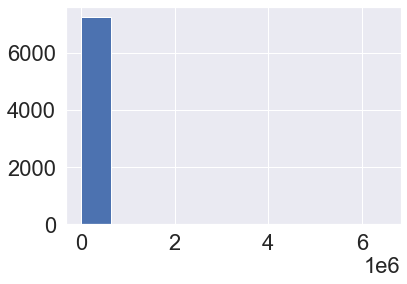

In [1552]:
plt.hist(df["Kilometers_Driven"])

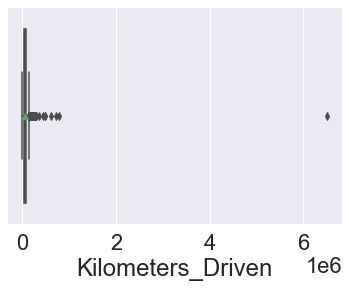

In [1553]:
sns.boxplot(df["Kilometers_Driven"], showmeans = True)

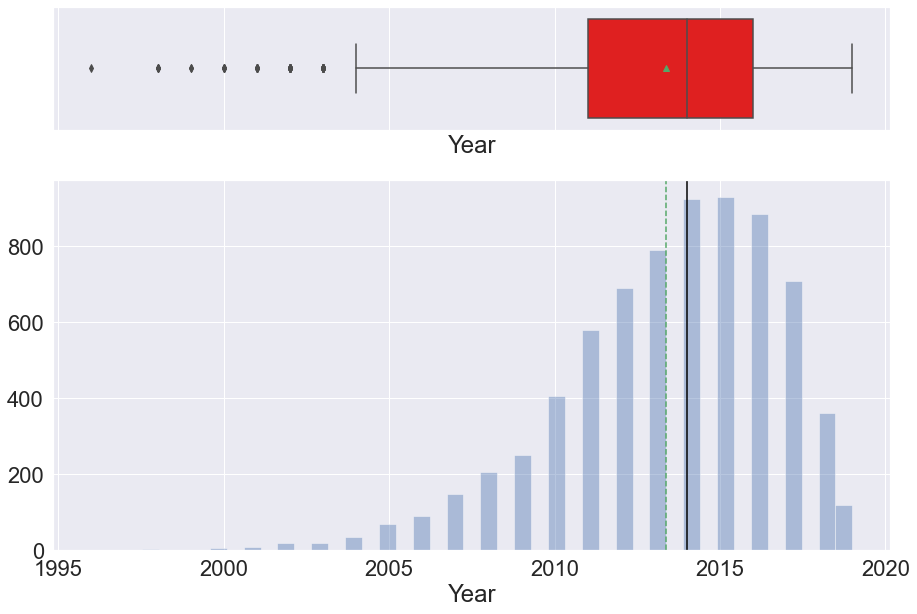

In [1302]:
histogram_boxplot(df.Year)

(array([5204.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2049.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

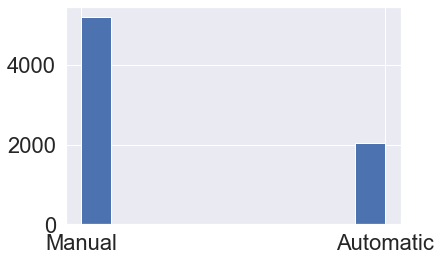

In [1554]:
plt.hist(df['Transmission'])

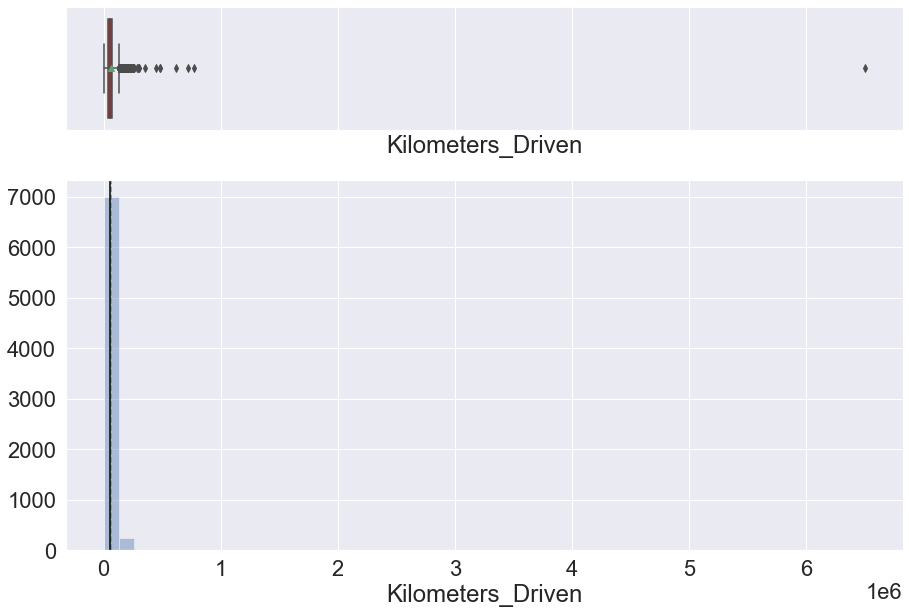

In [1555]:
histogram_boxplot(df.Kilometers_Driven)

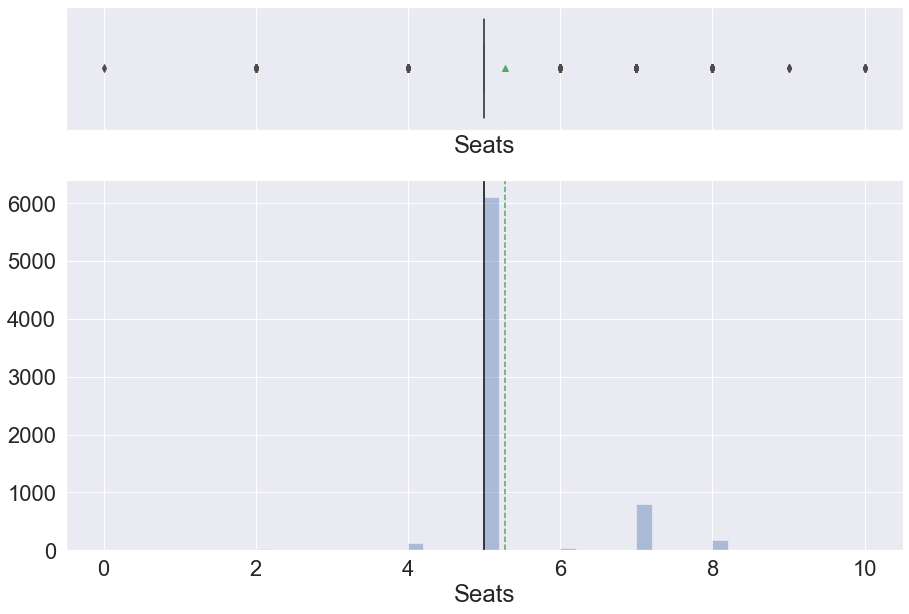

In [1556]:
histogram_boxplot(df.Seats)

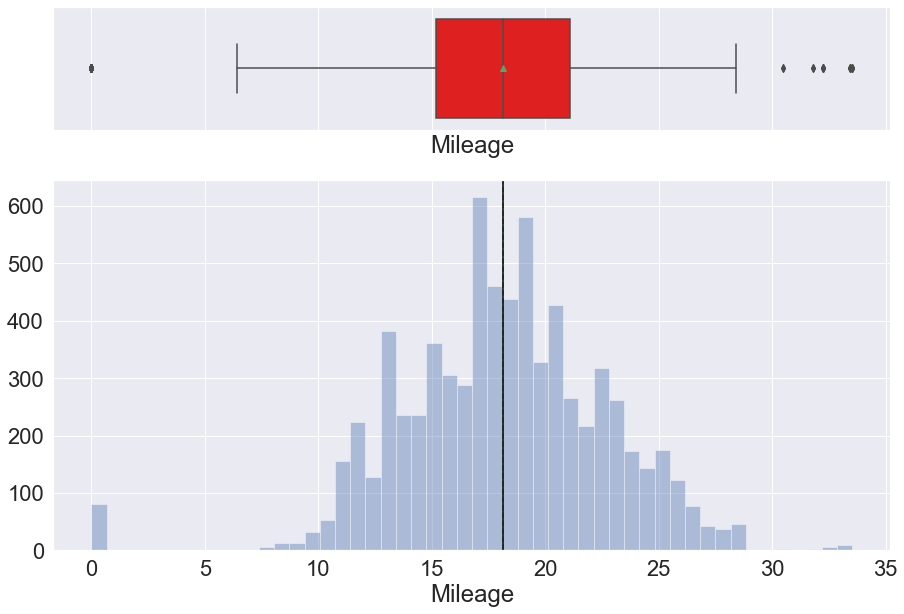

In [1306]:
histogram_boxplot(df["Mileage"])

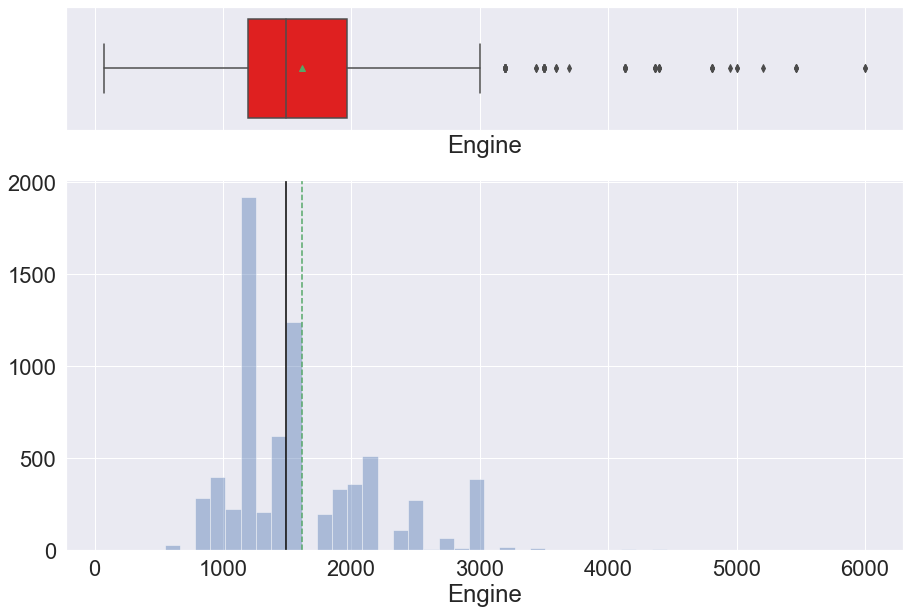

In [1307]:
histogram_boxplot(df["Engine"])

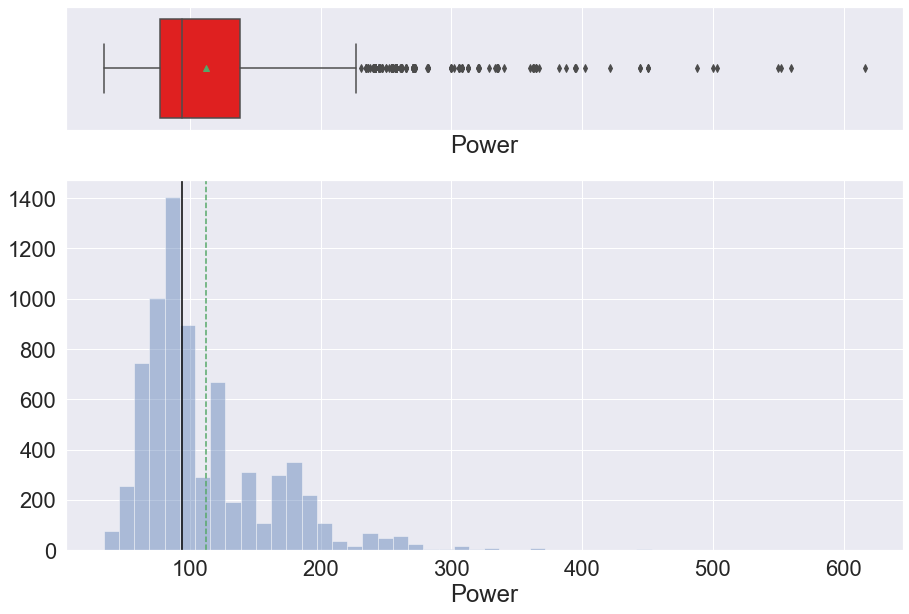

In [1308]:
histogram_boxplot(df["Power"])

# Bi Variate Analysis

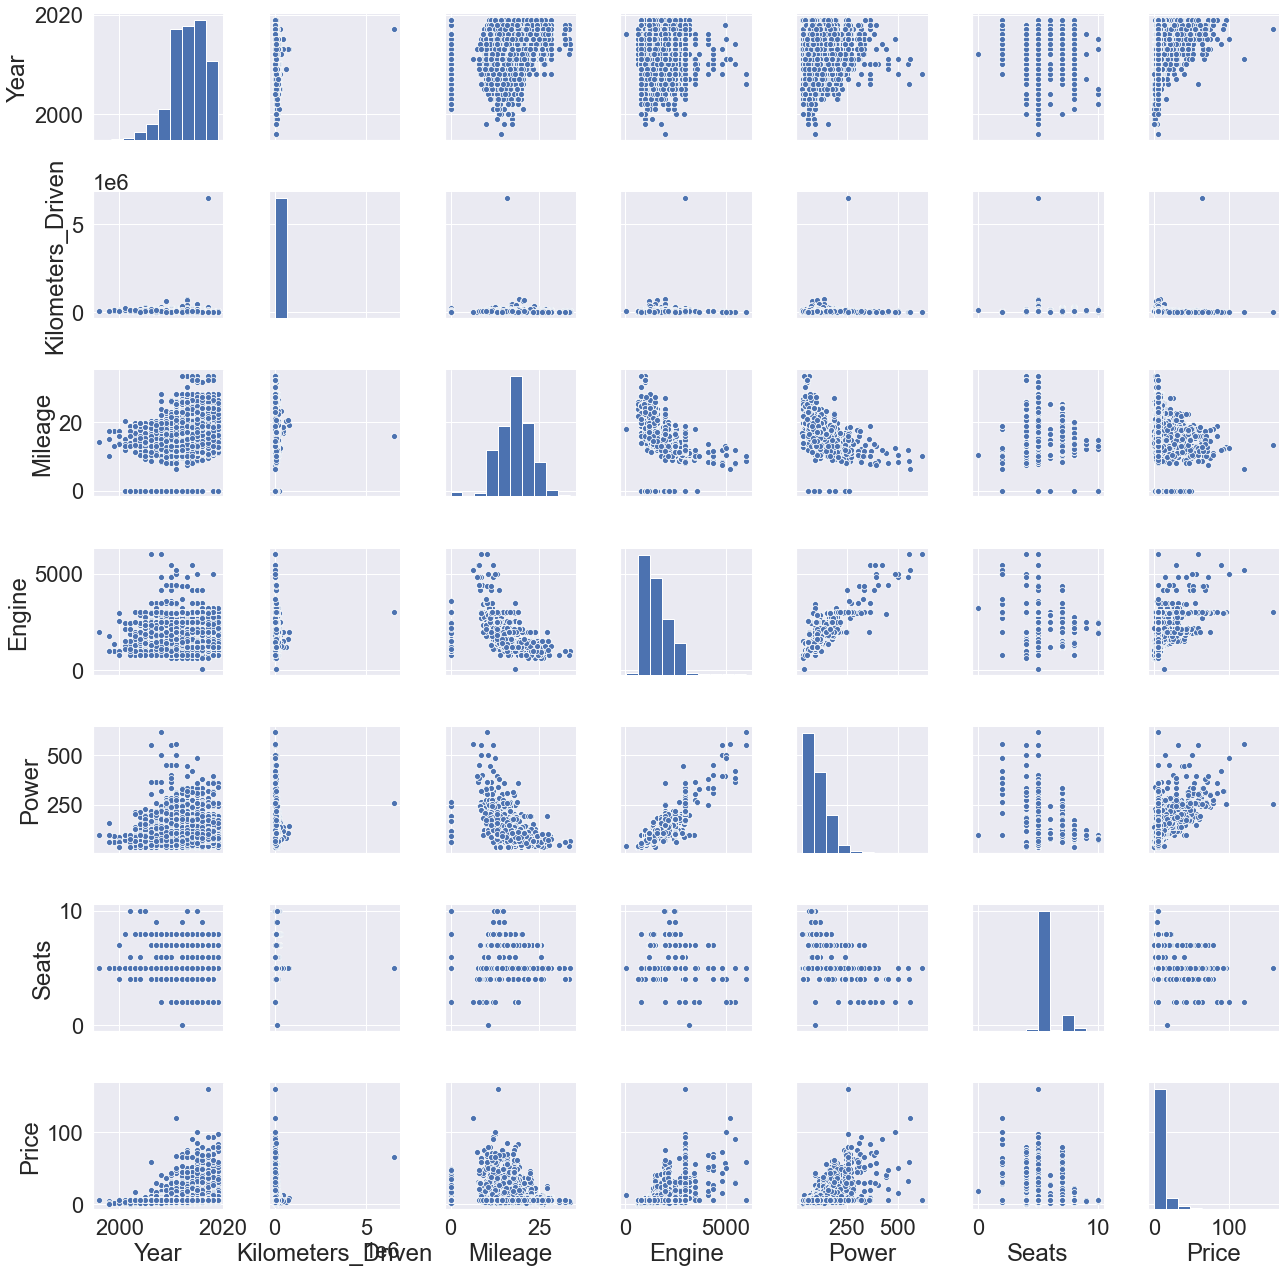

In [1309]:
sns.pairplot(df)

In [1557]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.187859,0.322437,-0.052736,0.025080,0.010849,0.276009
Kilometers_Driven,-0.187859,1.000000,-0.069122,0.094591,0.028203,0.089837,-0.011062
Mileage,0.322437,-0.069122,1.000000,-0.583279,-0.491079,-0.302202,-0.278190
Engine,-0.052736,0.094591,-0.583279,1.000000,0.854561,0.399339,0.601519
Power,0.025080,0.028203,-0.491079,0.854561,1.000000,0.097627,0.702492
Seats,0.010849,0.089837,-0.302202,0.399339,0.097627,1.000000,0.047136
Price,0.276009,-0.011062,-0.278190,0.601519,0.702492,0.047136,1.000000


In [1558]:
df.skew()

Year                 -0.839816
Kilometers_Driven    61.582575
Mileage              -0.438384
Engine                1.420236
Power                 2.001051
Seats                 1.914044
Price                 3.735538
dtype: float64

In [1559]:
df['Kilometers_Driven'] = (df.Kilometers_Driven - df.Kilometers_Driven.mean())/df.Kilometers_Driven.std(ddof=0)

In [1560]:
df['Engine'] = (df.Engine - df.Engine.mean())/df.Engine.std(ddof=0)

In [1561]:
df['Power'] = (df.Power - df.Power.mean())/df.Power.std(ddof=0)

In [1562]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.157553,CNG,Manual,First,26.60,-1.041041,-1.023310,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.209650,Diesel,Manual,First,19.67,-0.056939,0.262431,5.0,12.50
2,Honda Jazz V,Chennai,2011,-0.150424,Petrol,Manual,First,18.20,-0.702335,-0.446200,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,0.335232,Diesel,Manual,First,20.77,-0.619765,-0.445067,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.213559,Diesel,Automatic,Second,15.20,0.593512,0.538324,5.0,17.74


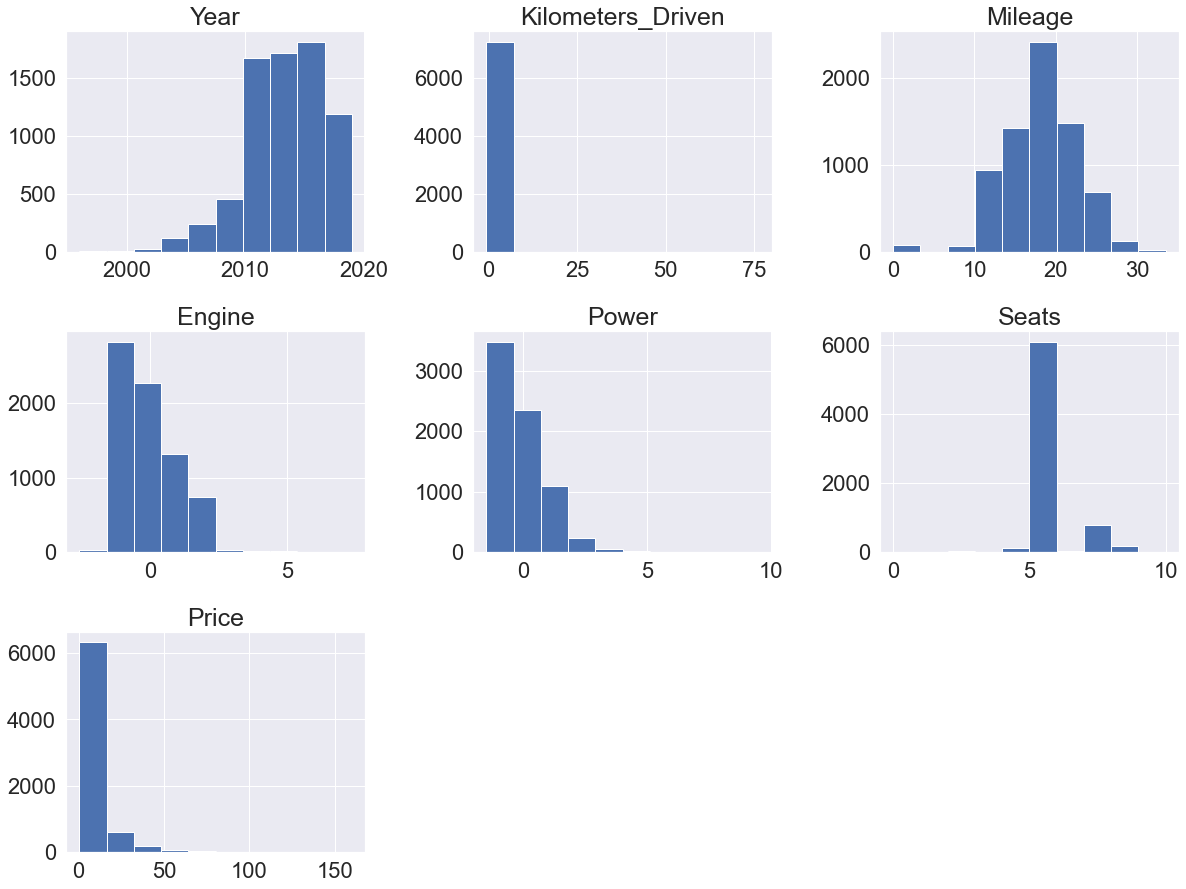

In [1563]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

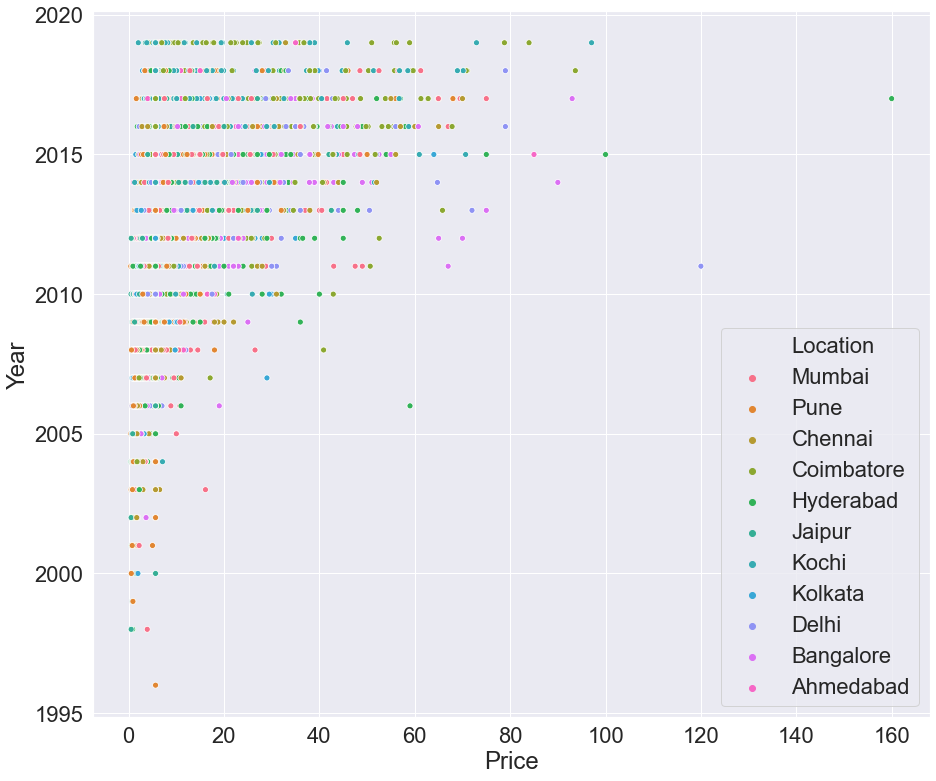

In [1564]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Year', x='Price', hue='Location', data=df);

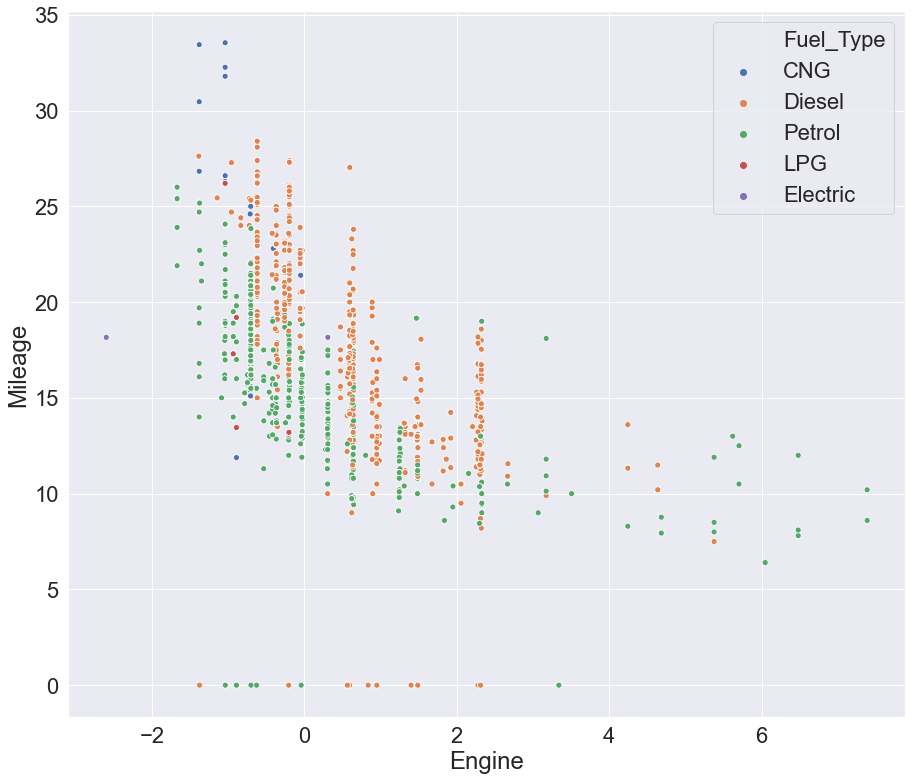

In [1565]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Mileage', x='Engine', hue='Fuel_Type', data=df);

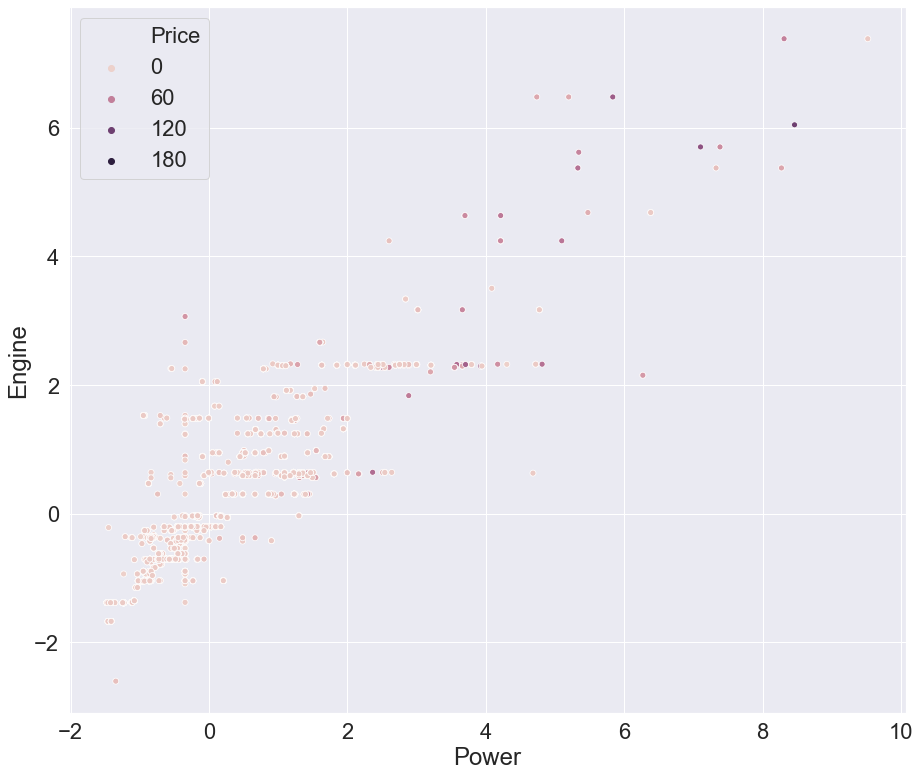

In [1504]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Engine', x='Power', hue='Price', data=df);

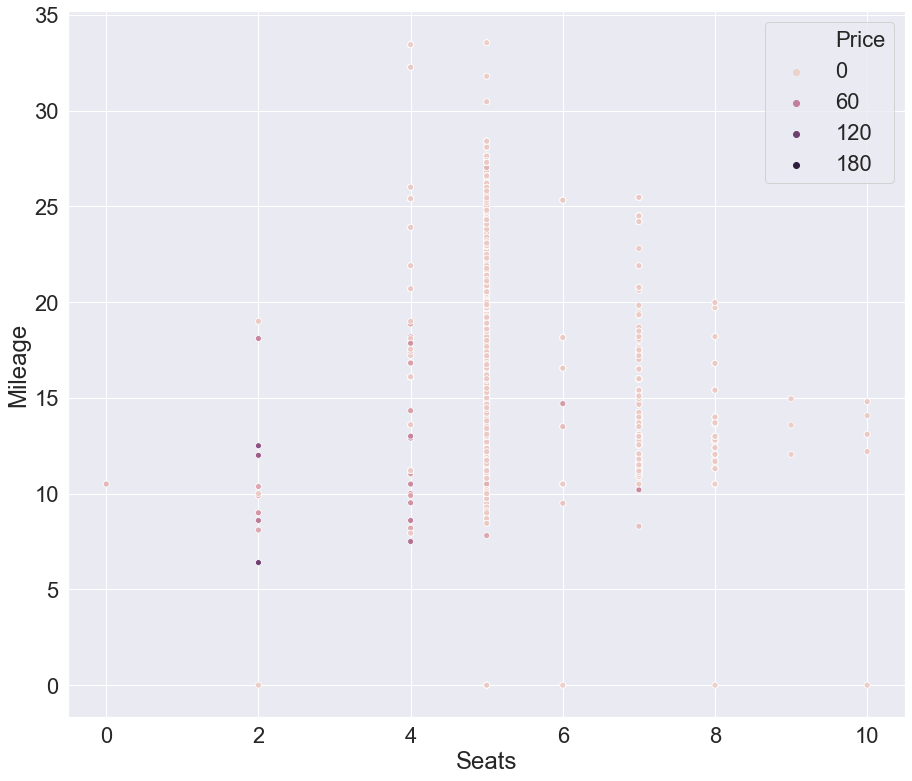

In [1566]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Mileage', x='Seats', hue='Price', data=df);

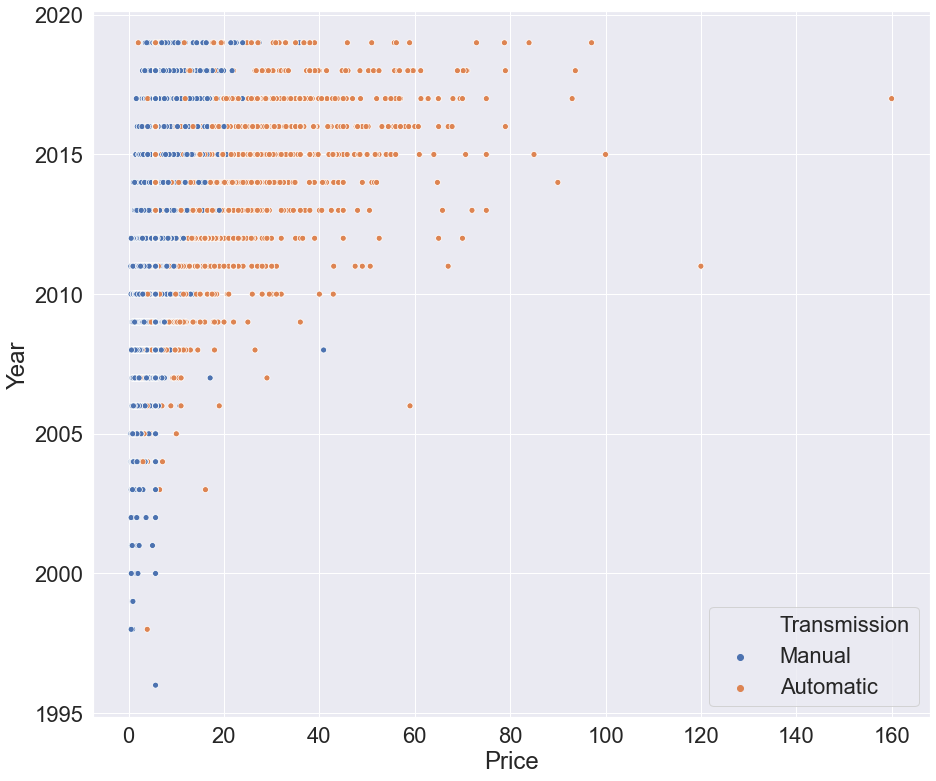

In [1567]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Year', x='Price', hue='Transmission', data=df);

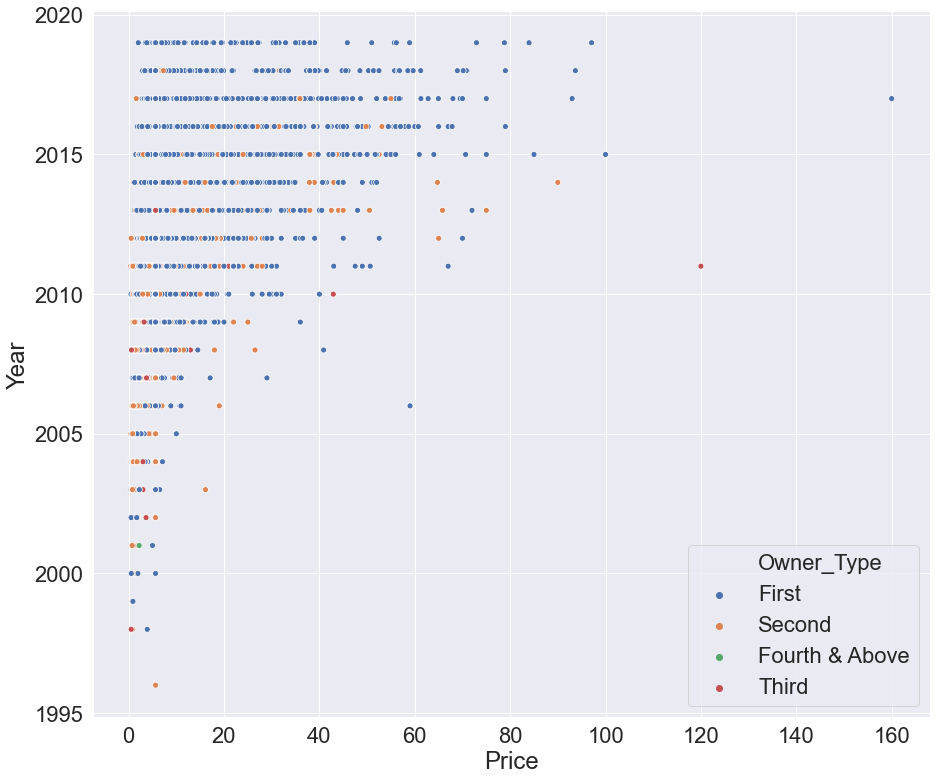

In [1568]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Year', x='Price', hue='Owner_Type', data=df);

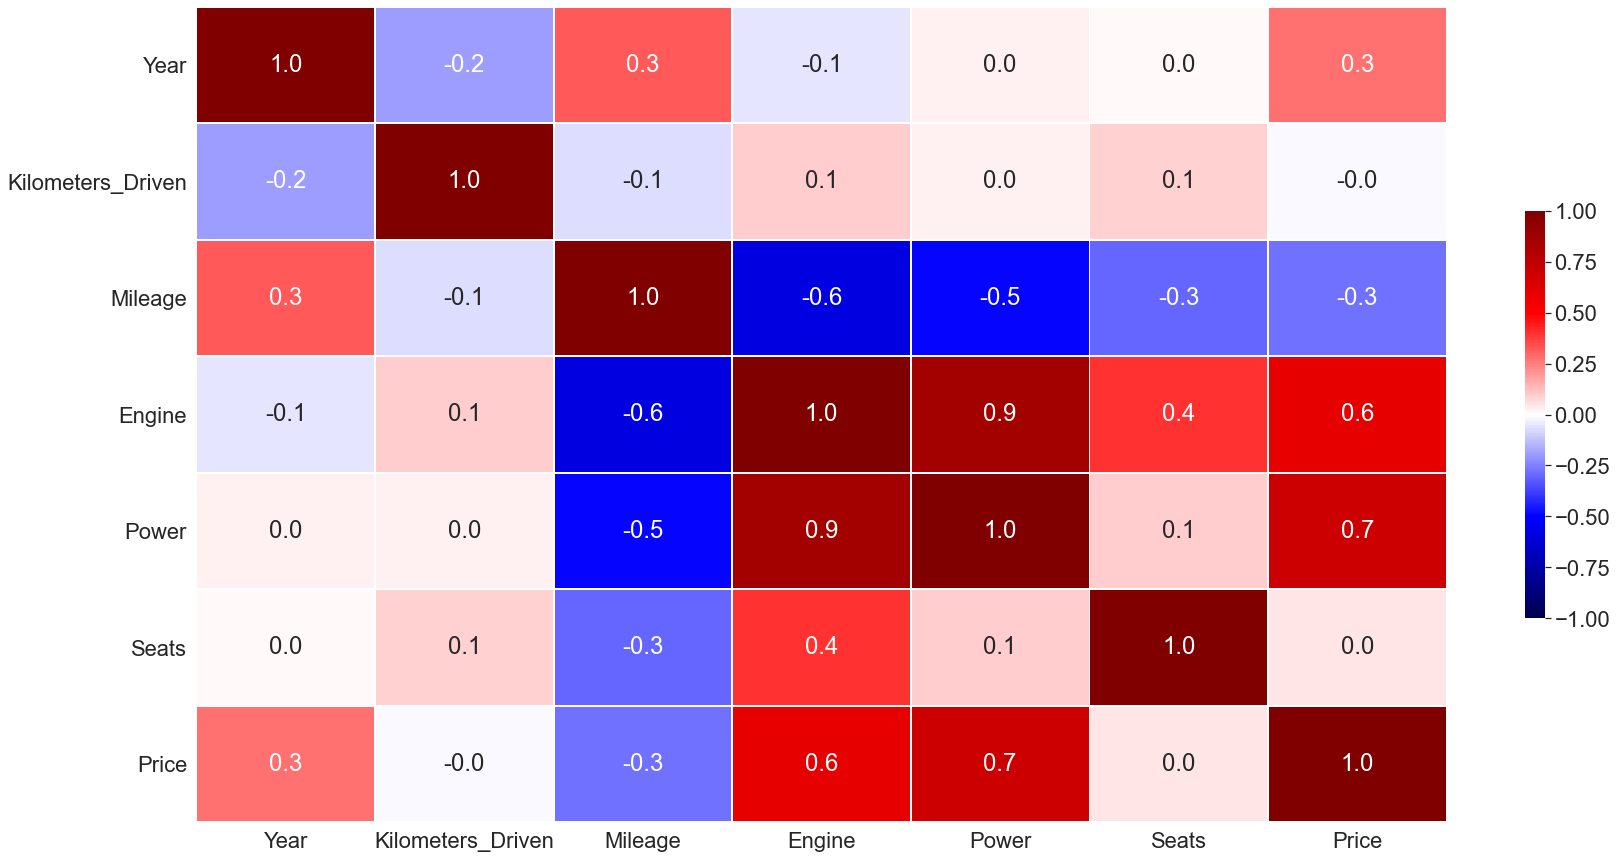

In [1569]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_columns].corr() 


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

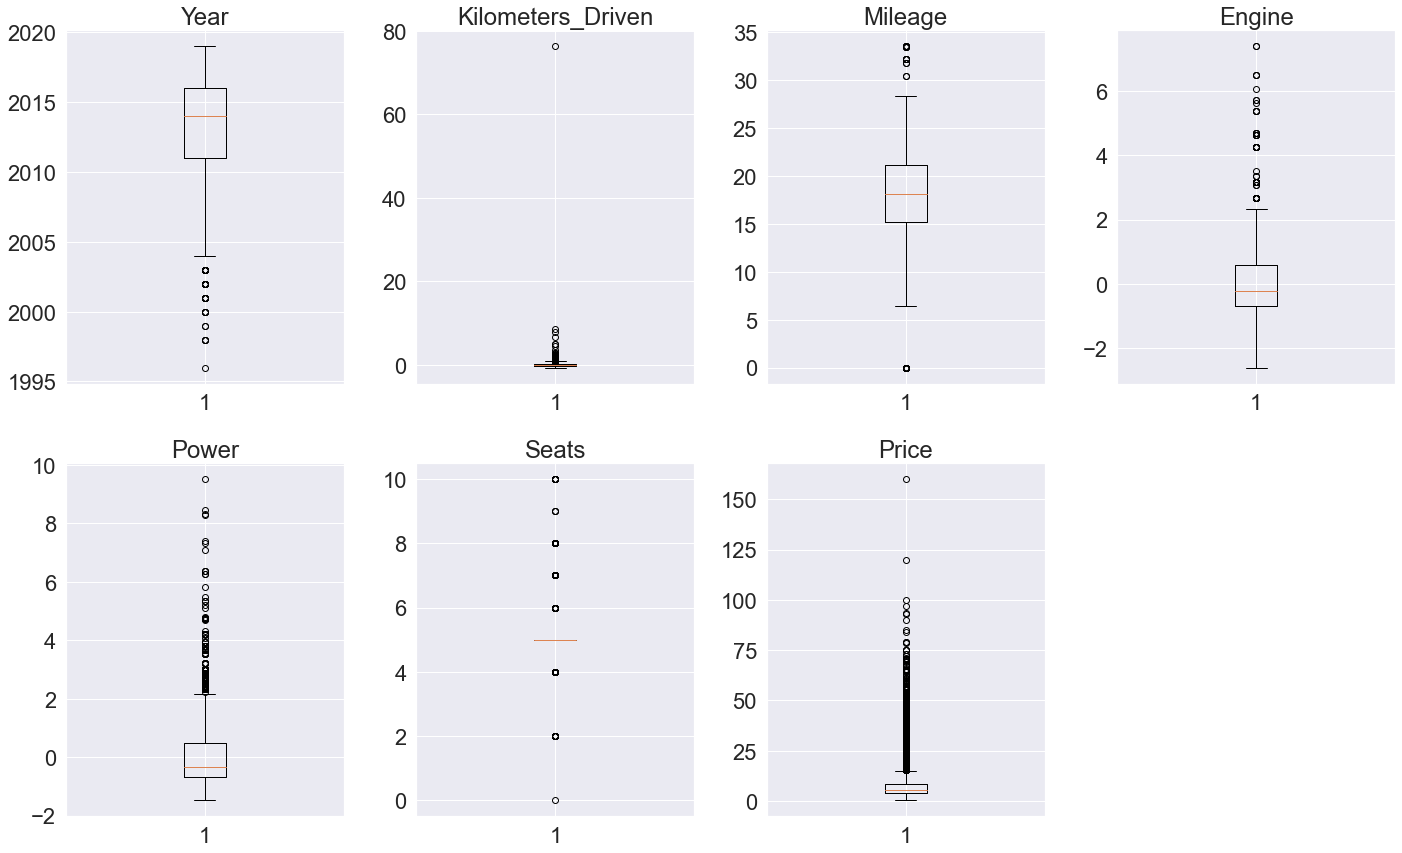

In [1570]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [1571]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df


In [1572]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.187859,0.322437,-0.052736,0.025080,0.010849,0.276009
Kilometers_Driven,-0.187859,1.000000,-0.069122,0.094591,0.028203,0.089837,-0.011062
Mileage,0.322437,-0.069122,1.000000,-0.583279,-0.491079,-0.302202,-0.278190
Engine,-0.052736,0.094591,-0.583279,1.000000,0.854561,0.399339,0.601519
Power,0.025080,0.028203,-0.491079,0.854561,1.000000,0.097627,0.702492
Seats,0.010849,0.089837,-0.302202,0.399339,0.097627,1.000000,0.047136
Price,0.276009,-0.011062,-0.278190,0.601519,0.702492,0.047136,1.000000


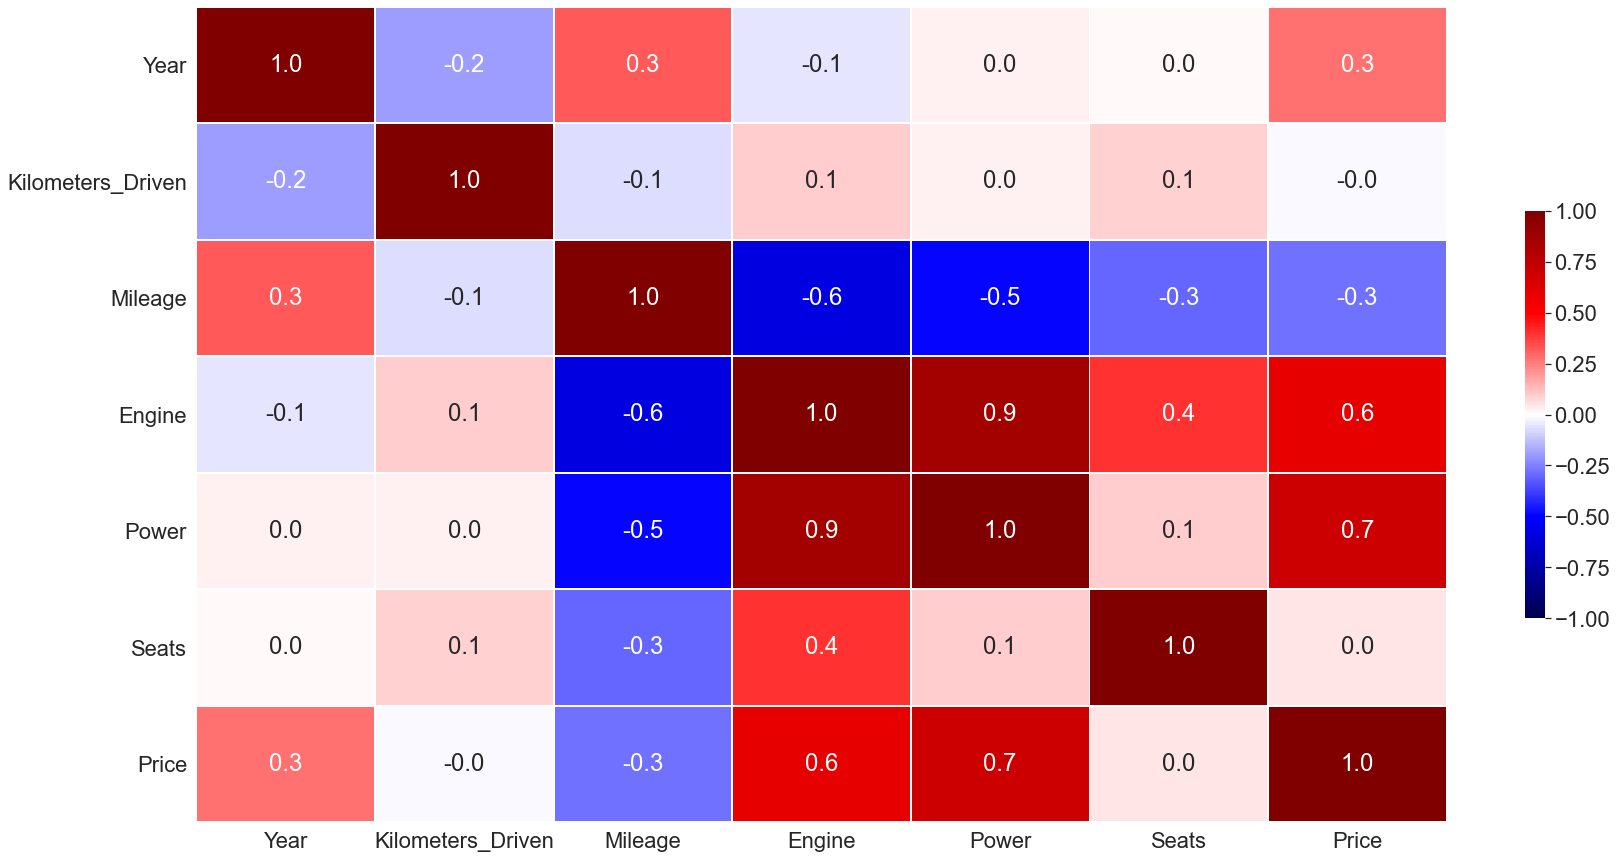

In [1573]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_columns].corr() 


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

* correlation map after outlier treatment shows there is strong correlation only between Engine, Power and Price

In [1574]:
df.dtypes

Name                 category
Location             category
Year                    int64
Kilometers_Driven     float64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
dtype: object

In [1575]:
df["Year"] = df["Year"].astype("int64")

In [1576]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.157553,CNG,Manual,First,26.60,-1.041041,-1.023310,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.209650,Diesel,Manual,First,19.67,-0.056939,0.262431,5.0,12.50
2,Honda Jazz V,Chennai,2011,-0.150424,Petrol,Manual,First,18.20,-0.702335,-0.446200,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,0.335232,Diesel,Manual,First,20.77,-0.619765,-0.445067,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.213559,Diesel,Automatic,Second,15.20,0.593512,0.538324,5.0,17.74


In [1577]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.157553,CNG,Manual,First,26.60,-1.041041,-1.023310,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,-0.209650,Diesel,Manual,First,19.67,-0.056939,0.262431,5.0,12.50
2,Honda Jazz V,Chennai,2011,-0.150424,Petrol,Manual,First,18.20,-0.702335,-0.446200,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,0.335232,Diesel,Manual,First,20.77,-0.619765,-0.445067,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,-0.213559,Diesel,Automatic,Second,15.20,0.593512,0.538324,5.0,17.74


# Model Building

In [1578]:
#Defining X and y variables
X = df[['Year', 'Engine', 'Power', 'Mileage', 'Transmission', 'Fuel_Type', 'Owner_Type', 'Seats']]
y = df[['Price']]

print(X.head())
print(y.head())

   Year    Engine     Power  Mileage Transmission Fuel_Type Owner_Type  Seats
0  2010 -1.041041 -1.023310    26.60       Manual       CNG      First    5.0
1  2015 -0.056939  0.262431    19.67       Manual    Diesel      First    5.0
2  2011 -0.702335 -0.446200    18.20       Manual    Petrol      First    5.0
3  2012 -0.619765 -0.445067    20.77       Manual    Diesel      First    7.0
4  2013  0.593512  0.538324    15.20    Automatic    Diesel     Second    5.0
   Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74


In [1579]:
print(X.shape)
print(y.shape)

(7253, 8)
(7253, 1)


# Create dummy variables

In [1580]:
X = pd.get_dummies(X, columns=['Transmission', 'Owner_Type', 'Fuel_Type'], drop_first= False)
X.head()

,Year,Engine,Power,Mileage,Seats,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,-1.041041,-1.023310,26.60,5.0,0,1,1,0,0,0,1,0,0,0,0
1,2015,-0.056939,0.262431,19.67,5.0,0,1,1,0,0,0,0,1,0,0,0
2,2011,-0.702335,-0.446200,18.20,5.0,0,1,1,0,0,0,0,0,0,0,1
3,2012,-0.619765,-0.445067,20.77,7.0,0,1,1,0,0,0,0,1,0,0,0
4,2013,0.593512,0.538324,15.20,5.0,1,0,0,0,1,0,0,1,0,0,0


In [1581]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1582]:
X_train.head()

,Year,Engine,Power,Mileage,Seats,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
3181,2014,-1.041041,-0.855506,22.50,5.0,0,1,1,0,0,0,0,0,0,0,1
952,2018,1.309682,0.670602,13.68,7.0,0,1,1,0,0,0,0,1,0,0,0
2266,2009,2.302210,1.109009,11.50,7.0,0,1,1,0,0,0,0,1,0,0,0
1504,2017,-0.619765,-0.445067,20.77,7.0,0,1,1,0,0,0,0,1,0,0,0
7213,2013,-0.619765,-0.723984,22.30,5.0,0,1,1,0,0,0,0,1,0,0,0


# Choose Model, Train and Evaluate

In [1583]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ypred = linearregression.predict(X_test)

Intercept of the linear equation: [-1748.55885824]

COefficients of the equation are: [[ 0.87884138  0.54261639  5.64663117 -0.16691823 -0.87620034  0.96107544
  -0.96107544 -1.34535124  3.07647536 -1.24834966 -0.48277446 -1.00339183
  -1.80530732  6.20776276  0.3651057  -3.76416932]]


# Model Performance

In [1584]:
# Mean Absolute Error on test
mean_absolute_error(y_test, ypred)

3.6763177278893244

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals

In [1585]:
# RMSE on test data
mean_squared_error(y_test, ypred)**0.5

6.240011432908366

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value

In [1586]:
# R2 Squared: on test
r2_score(y_test, ypred)

0.5991526823971641

R^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

R^2 value is 0.59 which means that in this model independent variables are able to explain only arounnd 60% of variances in dependent variable

# Transformations , Feature Engineering

In [1587]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=4, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.7540843093984095


after applying polynomial transformation model accuracy increased to 75%

In [1588]:
print(y_pred)

[[ 5.27495715]
 [ 5.03765246]
 [ 2.19780871]
 ...
 [ 4.34819934]
 [ 3.13530871]
 [13.86773059]]


# Using Stats Model

In [1590]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     513.8
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        08:40:00   Log-Likelihood:                -16994.
No. Observations:                5077   AIC:                         3.402e+04
Df Residuals:                    5063   BIC:                         3.411e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

** Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, Price decreases with their increase.
- Positive values of coefficient shows that, Price increases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 

## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.59**, which is not good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Mileage, Engine, Power  and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-896.6969**

3. **Schooling coeff**: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Checking the Linear Regression Assumptions

*No Multicollinearity
*Mean of residuals should be 0
*No Heteroscedacity
*Linearity of variables
*Normality of error terms

In [1592]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                        0.000000
Year                         1.425556
Engine                       7.670274
Power                        6.046844
Mileage                      2.518294
Seats                        1.777197
Transmission_Automatic            inf
Transmission_Manual               inf
Owner_Type_First                  inf
Owner_Type_Fourth & Above         inf
Owner_Type_Second                 inf
Owner_Type_Third                  inf
Fuel_Type_CNG                     inf
Fuel_Type_Diesel                  inf
Fuel_Type_Electric                inf
Fuel_Type_LPG                     inf
Fuel_Type_Petrol                  inf
dtype: float64



* Check for VIF score



## Removing Multicollinearity
 * To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again


In [1613]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1[['Year', 'Engine', 'Mileage', 'Power', 'Seats']]
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Year       102.531074
Engine       6.194782
Mileage     25.495220
Power        4.967549
Seats       70.392704
dtype: float64



In [1614]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.705
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              2423.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):                        0.00
Time:                        09:03:41   Log-Likelihood:                         -17398.
No. Observations:                5077   AIC:                                  3.481e+04
Df Residuals:                    5072   BIC:                                  3.484e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# We can see Adjusted-R squared for OLSmod2 is : 0.70 while for OLSmod 1 is : 0.59